In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import dirname, join as pjoin
import scipy.io as sio
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn import utils

In [ ]:
data = []
for i in range(1, 28):
    for j in range(1, 9):
        for k in range(1, 5):
            filename = f'/content/a{i}_s{j}_t{k}_inertial.mat'
            if os.path.isfile(filename):
                for element in sio.loadmat(filename)["d_iner"]:
                  x=list(element)
                  x.append(j)
                  x.append(k)
                  x.append(i)
                  data.append(x)

In [ ]:
col=["0","1","2","3","4","5","subject","experience","action"]
df=pd.DataFrame(data, columns=col)
df.to_csv('data.csv', index = False)
d = pd.read_csv("data.csv")
d

,0,1,2,3,4,5,subject,experience,action
0,-0.959473,-0.177734,-0.192871,5.221374,1.526718,0.152672,1,1,1
1,-0.961914,-0.153320,-0.159912,6.778626,1.954198,0.244275,1,1,1
2,-0.974609,-0.152832,-0.145996,11.267176,3.175573,1.099237,1,1,1
3,-0.941895,-0.135742,-0.127930,16.885496,4.732824,2.320611,1,1,1
4,-0.958252,-0.201416,-0.139404,16.030534,4.000000,0.366412,1,1,1
...,...,...,...,...,...,...,...,...,...
155633,-0.908936,0.045410,0.541992,-1.801527,0.427481,0.000000,8,3,27
155634,-0.909668,0.055176,0.532471,-2.076336,0.335878,0.244275,8,3,27
155635,-0.916748,0.050781,0.528320,-1.954198,0.396947,0.305344,8,3,27
155636,-0.915039,0.041260,0.534424,-1.648855,0.244275,0.213740,8,3,27


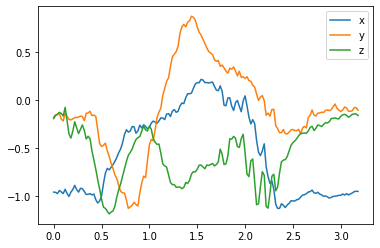

In [ ]:
def tracer_signal(df, capteur, action, sujet, essai):
  df2=df.loc[(df['subject'] == sujet) & (df['action'] == action) &  (df['experience'] == essai)]
  #abscisse - temps
  fxyz=[k/50 for k in range(len(df2))]
  if capteur == 1:
    x = df2['0']
    y = df2['1']
    z = df2['2']
    plt.plot(fxyz,x, label='x')
    plt.plot(fxyz,y,  label='y')
    plt.plot(fxyz,z,  label='z')
    plt.legend()
  if capteur == 2:
    x = df2['3']
    y = df2['4']
    z = df2['5']
    plt.plot(fxyz,x, label='x')
    plt.plot(fxyz,y,  label='y')
    plt.plot(fxyz,z,  label='z')
    plt.legend()

tracer_signal(df, 1, 1, 1, 1)


In [ ]:
def feature_extraction(df):
  grouped_action = df.groupby(['action'])
  moyennes = grouped_action.mean()
  ecart_types = grouped_action.std()
  V = []
  for i in range(27):
    vi = []
    for j in range(6) :
      vi.append(moyennes[str(j)].to_numpy()[i])
      vi.append(ecart_types[str(j)].to_numpy()[i])
    V.append(vi)
  return V
feature_extraction(df)

[[-0.6811319089320388,
  0.47499137028329363,
  -0.2584349889320388,
  0.5406395768231316,
  -0.26932655067961164,
  0.39391179175797086,
  23.581163566601944,
  95.72931891072517,
  -2.182411626213592,
  80.75649725020713,
  -18.731051657669905,
  119.99738608778206],
 [-0.6126190778491172,
  0.5329338394909674,
  -0.19636199578651686,
  0.5210523086669361,
  -0.3409743206260032,
  0.38604064636494845,
  -37.96528126565008,
  110.38529685980025,
  -17.45884847371589,
  96.34731731415887,
  12.834058295545747,
  103.06567505240947],
 [-0.4273957590835869,
  0.7393987064601937,
  -0.18090196008591372,
  0.9226818388113559,
  -0.15865544818328262,
  0.37267286092802815,
  4.838609801682477,
  167.49983419455125,
  -6.917864121711116,
  103.28942130830562,
  -8.748782954179344,
  173.0474884526883],
 [-0.35102282224352827,
  0.8442686915111394,
  -0.48790850987535955,
  0.4379806466826238,
  -0.13331463873441995,
  0.735166615665364,
  9.504567710642378,
  67.2189842036469,
  -5.060833034

In [ ]:
def mean_std_groupby_S_A(df):
    data_grouby=df.drop(["experience"],axis=1).groupby(['action',"subject"]).agg([('mean', 'mean'), ('std', 'std')])

    table=[col[1]+'_'+str(col[0]) for i, col in enumerate(data_grouby.columns)]

    data_col= [''.join(col[1]+'_'+str(col[0])) for i, col in enumerate(data_grouby.columns)]

    data_grouby.columns=data_col

    return data_grouby
df_grouped = mean_std_groupby_S_A(df)
df_grouped

mean_0     std_0    mean_1     std_1    mean_2     std_2  \
action subject                                                               
1      1       -0.548118  0.436651 -0.101052  0.502308 -0.538813  0.262218   
       2       -0.529399  0.559647 -0.184759  0.694947 -0.141455  0.367902   
       3       -0.609866  0.506191 -0.229931  0.602371 -0.388711  0.276910   
       4       -0.868558  0.465813 -0.190084  0.738810 -0.108488  0.329882   
       5       -0.665988  0.425977 -0.273509  0.425144 -0.259910  0.446086   
...                  ...       ...       ...       ...       ...       ...   
27     4       -0.881691  0.128513 -0.354902  0.310863  0.274263  0.078804   
       5       -0.888660  0.170514 -0.309177  0.315316  0.224528  0.123562   
       6       -0.878852  0.201964 -0.186103  0.417261  0.187693  0.155263   
       7       -0.863865  0.122525 -0.222331  0.355941  0.422624  0.071023   
       8       -0.808204  0.176548 -0.267566  0.385526  0.350727  0.262575   

                   mean_3       std_3     mean_4      std_4     mean_5  \
action subject                                                           
1      1        29.686580   67.856313   1.687059  89.697976 -27.291718   
       2        33.826546  137.185918   8.680232  85.970330 -36.454237   
       3        30.049256   79.726013 -10.840419  87.310150 -24.566167   
       4         9.766076  101.466847  -0.876336  85.959737  -9.732074   
       5        13.102307  109.253370   5.372490  51.080609 -24.336004   
...                   ...         ...        ...        ...        ...   
27     4        -1.834298   20.848142   1.136389   8.282671  -0.845058   
       5        -1.899800   17.901420   0.574817   9.642404  -0.719336   
       6        -1.738825   18.010692   0.613512  12.167555  -0.523490   
       7        -1.915613   15.311766   1.245742   8.739154  -0.475017   
       8        -1.908809   22.535085   1.022019  24.086540  -0.331370   

                     std_5  
action subject              
1      1         80.112873  
       2        113.826342  
       3        140.046230  
       4        181.963326  
       5         64.048853  
...                    ...  
27     4         47.927252  
       5         40.567265  
       6         42.444240  
       7         48.765592  
       8         38.637103  

[216 rows x 12 columns]

In [ ]:
def data_split(data) :
    set_train={1,3,5,7}
    set_test={2,4,6,8}
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]
    for i in data.index:

      if i[1] in set_train:
        X_train.append(data.loc[(i[0], i[1]), :])
        y_train.append(i[0])
      elif i[1] in set_test:
        X_test.append(data.loc[(i[0], i[1]), :])
        y_test.append(i[0])

    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    y_train=pd.DataFrame(y_train)
    y_test=pd.DataFrame(y_test)

    y_train=y_train.rename(columns={0:'Action'})
    y_test=y_test.rename(columns={0:'Action'})
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(df_grouped)

In [ ]:
# Initialize scaler
scaler = StandardScaler()
# Scale data values
scaled_train_values = scaler.fit_transform(X_train)
scaled_test_values = scaler.transform(X_test)
# Reconstruct DataFrame with original row and column labels
X_train.loc[:,list(df_grouped.columns)]=scaled_train_values
X_test.loc[:,list(df_grouped.columns)]=scaled_test_values

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print("Score =", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       0.75      0.75      0.75         4
           3       0.44      1.00      0.62         4
           4       0.33      0.75      0.46         4
           5       0.50      0.50      0.50         4
           6       0.50      0.75      0.60         4
           7       1.00      0.50      0.67         4
           8       0.67      0.50      0.57         4
           9       0.50      0.75      0.60         4
          10       0.40      0.50      0.44         4
          11       1.00      0.50      0.67         4
          12       1.00      1.00      1.00         4
          13       1.00      0.25      0.40         4
          14       1.00      1.00      1.00         4
          15       1.00      0.75      0.86         4
          16       1.00      0.75      0.86         4
          17       0.50      0.25      0.33         4
          18       0.67    

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train.values.ravel())
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
#score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       0.50      0.75      0.60         4
           3       0.60      0.75      0.67         4
           4       1.00      0.50      0.67         4
           5       0.25      0.75      0.38         4
           6       0.67      0.50      0.57         4
           7       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         4
           9       0.30      0.75      0.43         4
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         4
          12       0.50      0.50      0.50         4
          13       0.67      1.00      0.80         4
          14       0.50      1.00      0.67         4
          15       0.75      0.75      0.75         4
          16       0.57      1.00      0.73         4
          17       0.67      0.50      0.57         4
          18       0.67    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


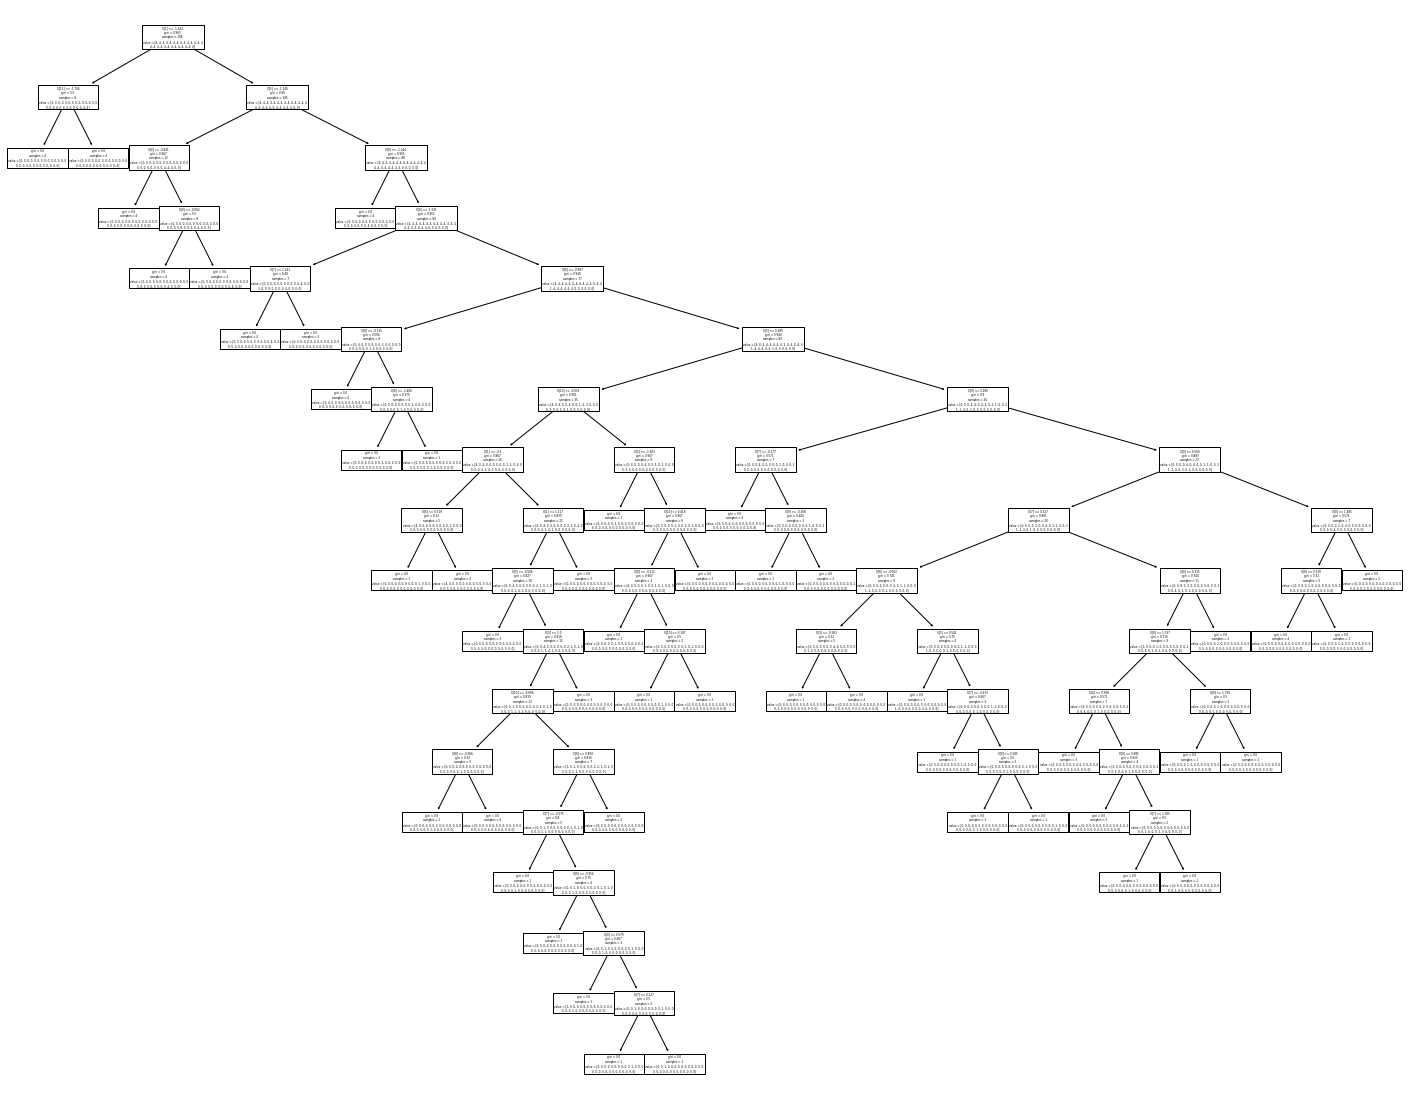

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.savefig('out.png')